# Proyecto (-1) - Alejandro Molina (T-1)

# Paso 1: Cargar y Visualizar el Conjunto de Datos Fish

### Líbrerias a utilizar:

In [1]:
import matplotlib.pyplot as plt #Se utilizara para graficar
import pandas as pd #Se utilizara para leer los datos de un archivo csv

In [2]:
# Cargamos los datos del archivo csv
data = pd.read_csv('C:/Users/Alejandro Molina/OneDrive/Escritorio/IA/Fish.csv')

# Mostramos las primeras filas de los datos
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


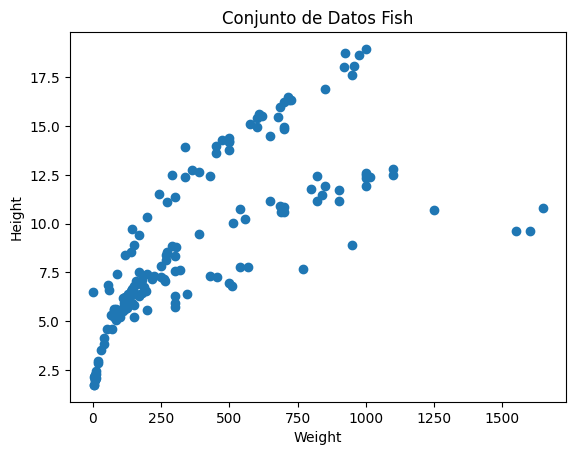

In [3]:
# Visualizar el conjunto de datos en un gráfico de dispersión
plt.scatter(data['Weight'], data['Height']) # Creamos grafico de dispersion
plt.xlabel('Weight') # Etiqueta eje x
plt.ylabel('Height') # Etiqueta eje y
plt.title('Conjunto de Datos Fish') # Titulo del grafico
plt.show() # Mostramos el grafico

# Paso 2: Selección de Características "Weight" y "Height" de la especie "Bream"

In [4]:
# Filtrar las filas correspondientes a la especie "Bream"
breamsData = data[data['Species'] == 'Bream']

# Seleccionamos las características "Weight" y "Height" de la especie "Bream"
fishData = breamsData[['Height', 'Weight']]

In [5]:
X = fishData.Height # Creamos un array con los valores de la característica "Height"
Y = fishData.Weight # Creamos un array con los valores de la característica "Weight"
n = len(X) # Calculamos el número de elementos de X

# Paso 3: apartado (a) - Regresión Lineal basado en el método de los Mínimos Cuadrados

## Explicación de las Fórmulas

### Sumatorias
- k1 = ∑ X * Y
- k2 = ∑ X^2 
- k3 = ∑ X
- k4 = ∑ Y


### Fórmula de la Pendiente y la Intersección
* m = (k1 * n - k3 * k4) / (n * k2 - k3^2)
* b = (k4 * k2 - k3 * k1)/(n * k2 - k3^2)

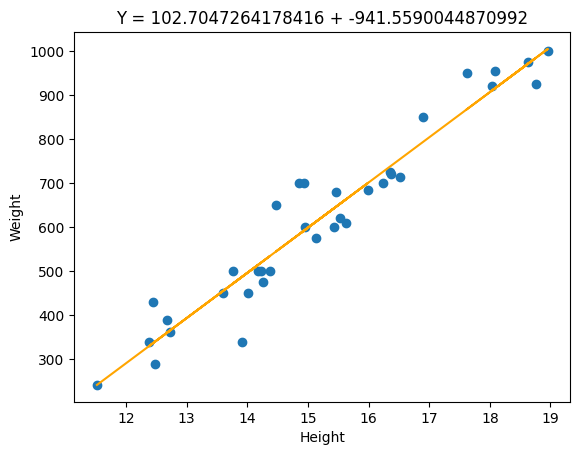

Valor de m= 102.7047264178416 Valor de b = -941.5590044870992


In [6]:
# Sumatorias
k1 = sum(Y*X)
k2 = sum(X**2)
k3 = sum(X)
k4 = sum(Y)

# Calculamos los coeficientes m y b
m = (k1*n  - k3*k4)/(n*k2 - k3**2)
b = (k4*k2 - k3*k1)/(n*k2 - k3**2)

# Creamos una función con los coeficientes m y b, para poder evaluarla en cualquier valor de x
def predict(x):
    return m*x + b

# Gráfica
plt.plot(X, Y, 'o', label='(X,Y)') # Graficamos los puntos (X,Y)
plt.plot(X, predict(X), color='orange', label='(X, predict(X))') # Graficamos los puntos (X, predict(X))
plt.xlabel('Height') # Etiqueta eje x
plt.ylabel('Weight') # Etiqueta eje y
title = 'Y = ' + str(m) + ' + ' + str(b)
plt.title(title)
plt.show() 
print("Valor de m=", m, "Valor de b =", b)

# Paso 3: apartado (b) - Regresión Lineal basado en el algoritmo de descenso del gradiente

## Explicación de las Fórmulas

### Derivadas Parciales
- ∂m = (-1/2*n) * ∑ ( Y - m * X - b ) * X
- ∂b = (-1/2*n) * ∑ ( Y - m * X - b )

### Fórmula de la Pendiente y la Intersección
* m = m - α * ∂m
* b = b - α * ∂b

α = 0.0001 (tasa de aprendizaje)

### Fórmula del Error Cuadrático Medio
* ECM = (1/2*n) * ∑ ( Y - m * X - b )^2

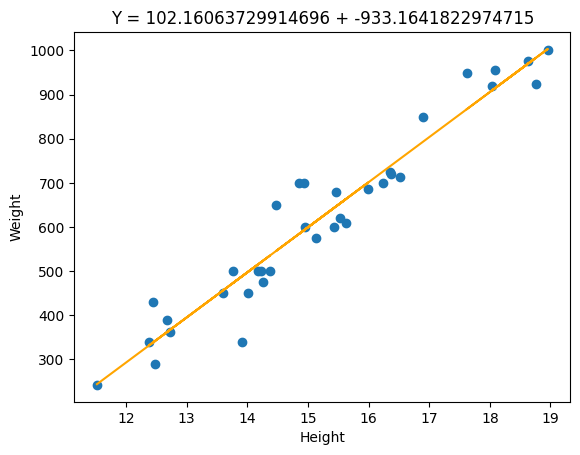

Valor de m= 102.16063729914696 Valor de b = -933.1641822974715


In [7]:
m = 0 # Inicializamos m = 0
b = 0 # Inicializamos b = 0
alpha = 1.22e-5 # Tasa de aprendizaje

# Función de costo se utiliza para medir el error de nuestro modelo
def costo(dm, db):
    return max(abs(alpha * dm), abs(alpha * db))

dm = - 1/2*n * sum( (Y - m * X - b ) * X) # Calculamos la derivada parcial de m
db = - 1/2*n * sum( Y - m * X - b )       # Calculamos la derivada parcial de b
error = costo(dm, db)                    # Calculamos el error

while error > 0.001:
    # Calculamos las derivadas parciales
    dm = - 1/2*n * sum( (Y - m * X - b ) * X)
    db = - 1/2*n * sum( Y - m * X - b )

    # Actualizamos los valores de m y b
    m = m - alpha * dm
    b = b - alpha * db
    error = costo(dm, db)

# Gráfica
plt.plot(X, Y, 'o', label='(X,Y)') # Graficamos los puntos (X,Y)
plt.plot(X, predict(X), color='orange', label='(X, predict(X))') # Graficamos la función f
plt.xlabel('Height') # Etiqueta eje x
plt.ylabel('Weight') # Etiqueta eje y
title = 'Y = ' + str(m) + ' + ' + str(b)
plt.title(title)
plt.show()
print("Valor de m=", m, "Valor de b =", b)


# Paso 4: Optimización del parametro de aprendizaje en el descenso de gradiente

<h3>Para optimizar aumentamos la tolerancia, pero esto provocara un aumento en el tiempo</h3>
<h3> Se espera un tiempo aprox. de 2min ~ 3min, y tomando en cuenta que alpha esta en su valor optimizado</h3> 

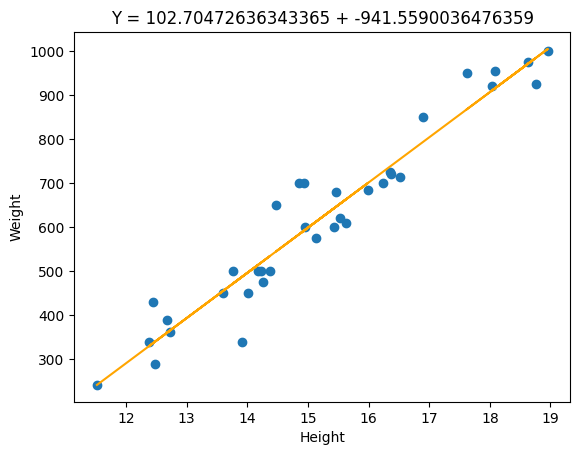

Valor de m= 102.70472636343365 Valor de b = -941.5590036476359


In [8]:
m = 0 # Inicializamos m = 0
b = 0 # Inicializamos b = 0
alpha = 1.22e-5  # Tasa de aprendizaje optimizado para el conjunto de datos Fish

dm = - 1/2*n * sum( (Y - m * X - b ) * X) # Calculamos la derivada parcial de m
db = - 1/2*n * sum( Y - m * X - b )       # Calculamos la derivada parcial de b
error = costo(dm, db)                    # Calculamos el error
while error > 1e-10:
    # Calculamos las derivadas parciales
    dm = - 1/2*n * sum( (Y - m * X - b ) * X)
    db = - 1/2*n * sum( Y - m * X - b )

    # Actualizamos los valores de m y b
    m = m - alpha * dm
    b = b - alpha * db
    error = costo(dm, db)

# Gráfica
plt.plot(X, Y, 'o', label='(X,Y)') # Graficamos los puntos (X,Y)
plt.plot(X, predict(X), color='orange', label='(X, predict(X))') # Graficamos la función f
plt.xlabel('Height') # Etiqueta eje x
plt.ylabel('Weight') # Etiqueta eje y
title = 'Y = ' + str(m) + ' + ' + str(b)
plt.title(title)
plt.show()
print("Valor de m=", m, "Valor de b =", b)